# Exploration of Ford GoBike System Data
### by Nouf Balharith

## Preliminary Wrangling

#### I picked Ford GoBike System Data from lyft website,this data about rides for april at 2019 in Gobike syste. Also, it contain 239111 rows and 14 columns.

In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [45]:
def read(data,x):
    df=pd.read_csv(data,x)
    return df

    
df=read('201904-fordgobike-tripdata.csv',';')


In [46]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239111 non-null int64
start_time                 239111 non-null object
end_time                   239111 non-null object
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239111 non-null float64
start_station_longitude    239111 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239111 non-null float64
end_station_longitude      239111 non-null float64
bike_id                    239111 non-null int64
user_type                  239111 non-null object
bike_share_for_all_trip    239111 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 25.5+ MB


In [48]:
sum(df.duplicated())

0

In [49]:
type(df.start_time[0])

str

In [50]:
df.nunique()

duration_sec                 5730
start_time                 239092
end_time                   239089
start_station_id              357
start_station_name            357
start_station_latitude        363
start_station_longitude       363
end_station_id                358
end_station_name              358
end_station_latitude          364
end_station_longitude         364
bike_id                      4520
user_type                       2
bike_share_for_all_trip         2
dtype: int64

## Assessing result:
> The start_time and end_time should convert to datetime type.Also, null values will be removed to increase the qualty of the data. 
> I will add a column for the days of starting the trips, in order to enhance the visualization.

# Cleanning 

In [51]:
#make a copy to avoid lose the original data
df_clean=df.copy()
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [52]:
#convert start_time and end_time type
df_clean['start_time'] = df_clean['start_time'].astype('datetime64')
df_clean['end_time'] = df_clean['end_time'].astype('datetime64')
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No


In [53]:
#Drop null values
df_clean=df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239047 entries, 0 to 239110
Data columns (total 14 columns):
duration_sec               239047 non-null int64
start_time                 239047 non-null datetime64[ns]
end_time                   239047 non-null datetime64[ns]
start_station_id           239047 non-null float64
start_station_name         239047 non-null object
start_station_latitude     239047 non-null float64
start_station_longitude    239047 non-null float64
end_station_id             239047 non-null float64
end_station_name           239047 non-null object
end_station_latitude       239047 non-null float64
end_station_longitude      239047 non-null float64
bike_id                    239047 non-null int64
user_type                  239047 non-null object
bike_share_for_all_trip    239047 non-null object
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 27.4+ MB


In [54]:
#Add day of the week for the starting time
df_clean['start_day']= df_clean['start_time'].dt.strftime('%a')
df_clean

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_day
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No,Tue
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No,Tue
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No,Tue
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No,Tue
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,Tue
5,1388,2019-04-30 23:53:05.982,2019-05-01 00:16:14.313,243.0,Bancroft Way at College Ave,37.869360,-122.254337,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3234,Customer,No,Tue
6,920,2019-04-30 23:57:56.340,2019-05-01 00:13:16.454,202.0,Washington St at 8th St,37.800754,-122.274894,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,3262,Subscriber,Yes,Tue
7,725,2019-04-30 23:56:11.219,2019-05-01 00:08:16.915,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,121.0,Mission Playground,37.759210,-122.421339,2706,Customer,No,Tue
8,488,2019-04-30 23:59:00.660,2019-05-01 00:07:08.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,64.0,5th St at Brannan St,37.776754,-122.399018,860,Subscriber,No,Tue
9,792,2019-04-30 23:53:37.604,2019-05-01 00:06:50.405,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,126.0,Esprit Park,37.761634,-122.390648,896,Subscriber,No,Tue


### What is the structure of your dataset?

> As mentioned prevously, the dataset contain 239111 rows with 14 coulmns:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type.

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in figuring out a strong relationship between the attributes, my focus on favorite' user day and hour for biking.




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>- user_type.
>- start_day.
>- duration_sec.

## Univariate Exploration


In [55]:
#Color 
base_color = sb.color_palette()[0]

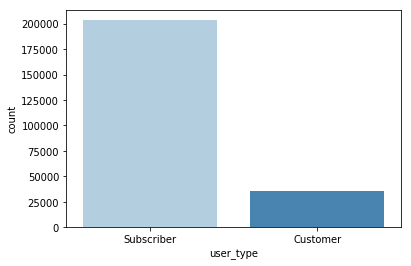

In [56]:
sb.countplot(data = df_clean, x = 'user_type', palette = 'Blues');

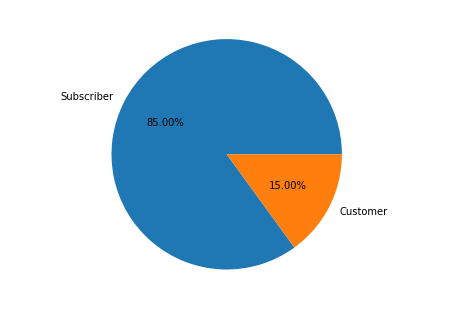

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['Subscriber', 'Customer']
students = [23,17,35,29,12]
ax.pie(df_clean.user_type.value_counts(), labels = langs,autopct='%1.2f%%');
plt.show();

##### As shown most of the users are subcribers.

In [58]:
df_clean['start_station_name'].describe()

count                                                239047
unique                                                  357
top       San Francisco Caltrain Station 2  (Townsend St...
freq                                                   4866
Name: start_station_name, dtype: object

As shown,there's 357 diifrent start station, So I will view the top 20 start stations  

In [59]:
#The top 20
df_clean['start_station_name'].value_counts().sort_values().tail(20)

The Embarcadero at Steuart St                                      1890
Townsend St at 7th St                                              1894
Beale St at Harrison St                                            2083
4th St at Mission Bay Blvd S                                       2085
Bancroft Way at College Ave                                        2118
Embarcadero BART Station (Beale St at Market St)                   2131
3rd St at Townsend St                                              2303
Civic Center/UN Plaza BART Station (Market St at McAllister St)    2358
2nd St at Townsend St                                              2622
Howard St at Beale St                                              2760
The Embarcadero at Sansome St                                      2941
Steuart St at Market St                                            3173
San Francisco Caltrain (Townsend St at 4th St)                     3322
Powell St BART Station (Market St at 5th St)                    

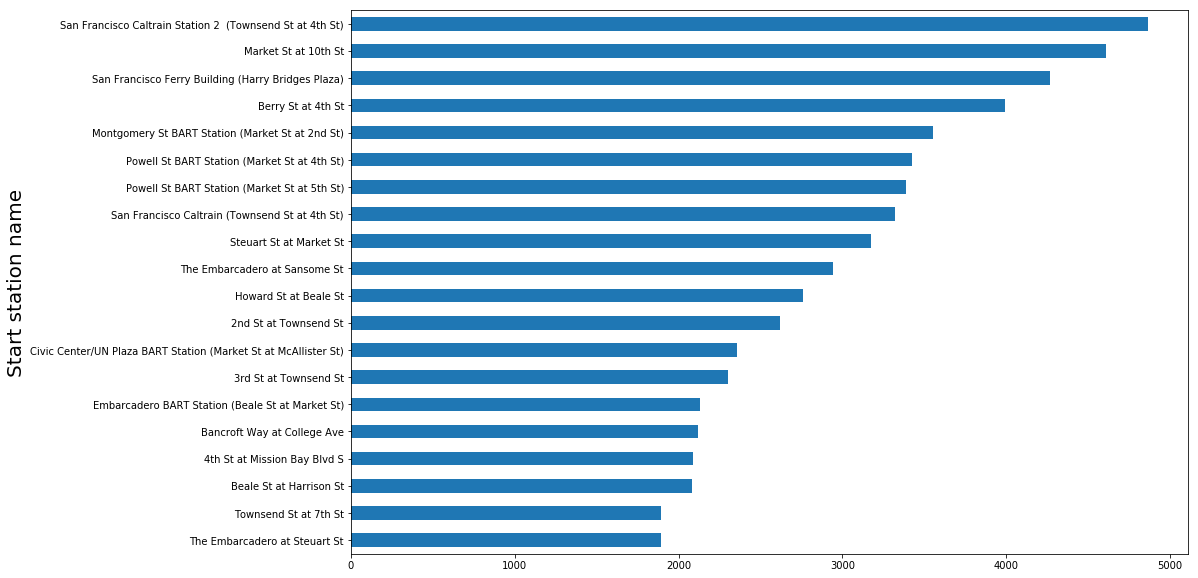

In [60]:
plt.figure(figsize=[15, 10]);
df_clean['start_station_name'].value_counts().sort_values().tail(20).plot(kind='barh');
plt.ylabel('Start station name',fontsize=20);

As shown the most started station is San Francisco Caltrain Station 2 (Townsend St at 4th St), while The
Embarcadero at Steuart St is the least, that counts less than 2000

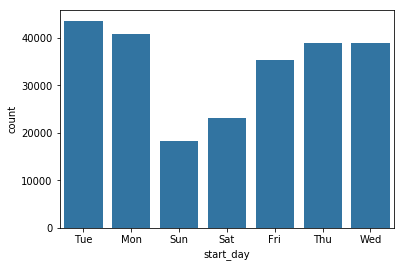

In [61]:
sb.countplot(data = df_clean, x = 'start_day', color=base_color);

##### The most started day was Tuesday, but the days of the week are not in the right order, So I will convert to ordinal.

In [62]:
Days = {'start_day': ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']}
for var in Days:
    order_ = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = Days[var])
    df_clean[var] = df_clean[var].astype(order_)

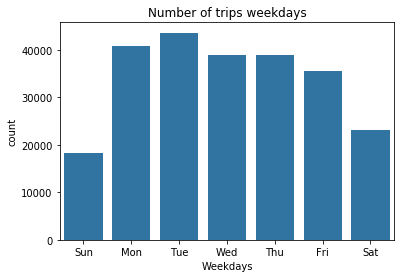

In [63]:
sb.countplot(data = df_clean, x = 'start_day', color=base_color)
plt.xlabel('Weekdays')
plt.title("Number of trips weekdays");

In [64]:
df_clean['duration_sec'].describe()

count    239047.000000
mean        802.448431
std        1989.807584
min          61.000000
25%         349.000000
50%         558.000000
75%         876.000000
max       86114.000000
Name: duration_sec, dtype: float64

 ##### 86114 is a huge number, convert the seconds to minutes will be much easier to use. Furthermore, Duration_sec made for me some troubles according to huge numbers and distribution. So I will solve this issue by adding a new column with  the second to minutes and use this column.

In [65]:
#I will create another column called duration_minute for the convert values
df_clean['duration_minute'] = df_clean['duration_sec']/60
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,start_day,duration_minute
0,50305,2019-04-30 22:33:55.155,2019-05-01 12:32:20.454,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,No,Tue,838.416667
1,53725,2019-04-30 20:43:41.632,2019-05-01 11:39:06.917,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,No,Tue,895.416667
2,78072,2019-04-30 10:32:46.489,2019-05-01 08:13:58.975,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,No,Tue,1301.200000
3,78969,2019-04-30 10:00:51.550,2019-05-01 07:57:01.262,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,No,Tue,1316.150000
4,1128,2019-04-30 23:59:04.739,2019-05-01 00:17:53.091,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,No,Tue,18.800000


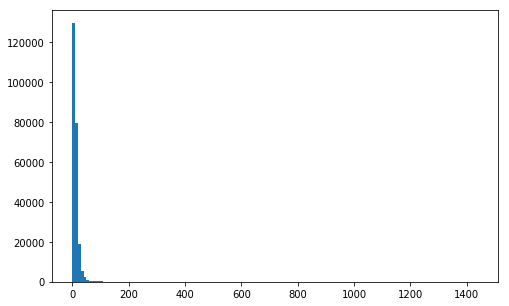

In [66]:
binsize = 10
bins = np.arange(0, df_clean['duration_minute'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_minute', bins=bins);

In [67]:
df_clean.duration_minute.describe()

count    239047.000000
mean         13.374141
std          33.163460
min           1.016667
25%           5.816667
50%           9.300000
75%          14.600000
max        1435.233333
Name: duration_minute, dtype: float64

Enhance the graph to make it more clear.

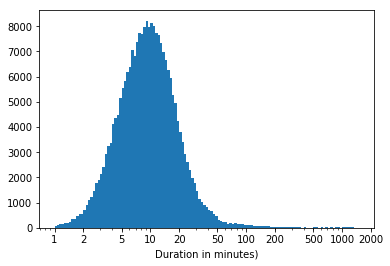

In [68]:
size = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+size, size)
plt.hist(data = df_clean, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration in minutes)');

###### After 100 consuder as outliers, so they will be delted to get noraml distrubtion.

In [69]:
df_clean = df_clean[df_clean['duration_minute'] <= 100]

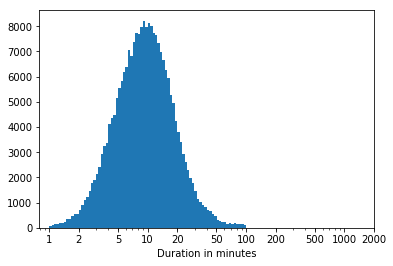

In [70]:
size = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+size, size)
plt.hist(data = df_clean, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration in minutes');

###### As shown,most trip are close to 10 minute duration(the mean)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Most of users are subscribers.
- For start_station_name, it contain 377 unique value, so in the bar chart I picked the top 20 start station.Also,
San Francisco Caltrain Station 2 (Townsend St at 4th St) have counted as the highest with 4866.
- Started day for the trips, Tuesday was the most day to bike, where Sunday is the least.
- Duration_sec contain a huge distrubution of numbers, so adding a cloumn converted tha seconds to minute is easy to use.
- Duration in minutes count 10 minutes as the highest duration for trips

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The days were in the wrong order that makes me get confused, so I changed the categorical type to ordinal in order to make more clear.Also,enhance the durationg throught enhancing in bins and remove some outliers in the duration. 

## Bivariate Exploration


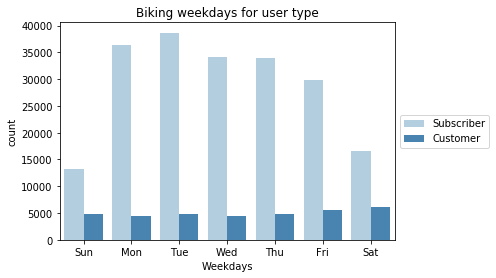

In [71]:
sb.countplot(data = df_clean, x = 'start_day', hue = 'user_type', palette = 'Blues');
plt.title('Biking weekdays for user type');
plt.xlabel('Weekdays');
plt.legend(loc='center', bbox_to_anchor=(1.150, 0.5));

###### Tuesday is the most dat to ride a bike for subscriber user
###### Saturday is the most dat to ride a bike for customer user

Getting the hours of starting trips will help me in build relationship

In [72]:
df_clean['start_hour']= df_clean['start_time'].dt.hour
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237649 entries, 4 to 239110
Data columns (total 17 columns):
duration_sec               237649 non-null int64
start_time                 237649 non-null datetime64[ns]
end_time                   237649 non-null datetime64[ns]
start_station_id           237649 non-null float64
start_station_name         237649 non-null object
start_station_latitude     237649 non-null float64
start_station_longitude    237649 non-null float64
end_station_id             237649 non-null float64
end_station_name           237649 non-null object
end_station_latitude       237649 non-null float64
end_station_longitude      237649 non-null float64
bike_id                    237649 non-null int64
user_type                  237649 non-null object
bike_share_for_all_trip    237649 non-null object
start_day                  237649 non-null category
duration_minute            237649 non-null float64
start_hour                 237649 non-null int64
dtypes: category(

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


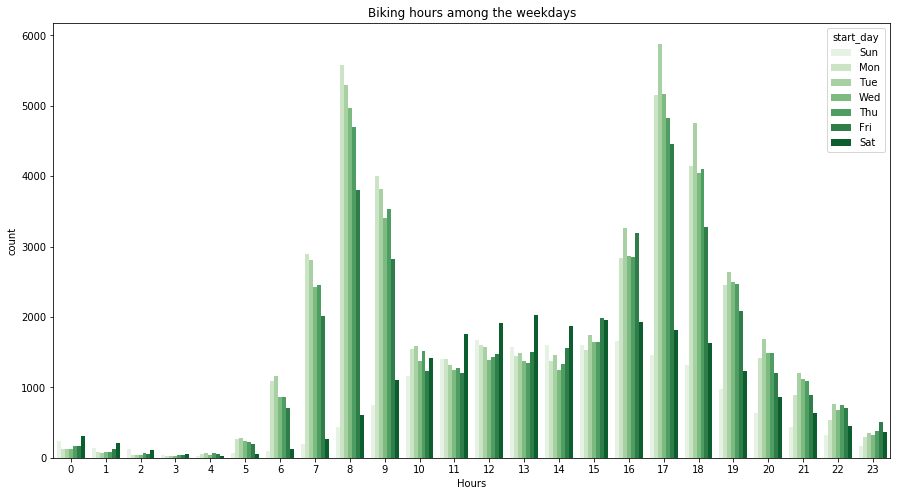

In [73]:
fig = plt.figure(figsize = [15,8])
sb.countplot(data = df_clean, x = 'start_hour', hue = 'start_day', palette = 'Greens');
plt.title('Biking hours among the weekdays');
plt.xlabel('Hours');

##### At 5 PM in Tuesday is the highest count for ride a bike comparing to other days and hours

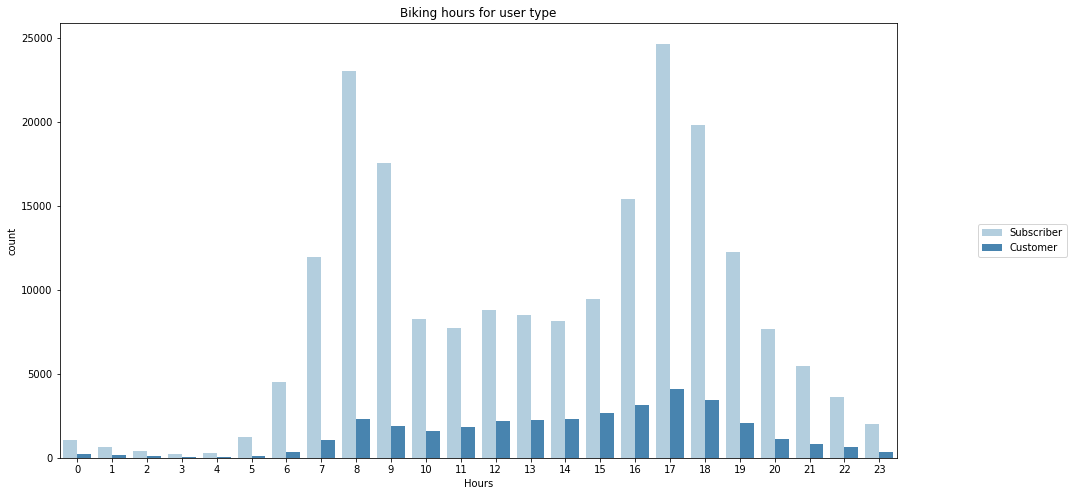

In [74]:
fig = plt.figure(figsize = [15,8])
sb.countplot(data = df_clean, x = 'start_hour', hue = 'user_type', palette = 'Blues');
plt.title('Biking hours for user type');
plt.xlabel('Hours');
plt.legend(loc='center', bbox_to_anchor=(1.150, 0.5));

##### 5 PM the most time to ride a bike for both subscriber and customer.

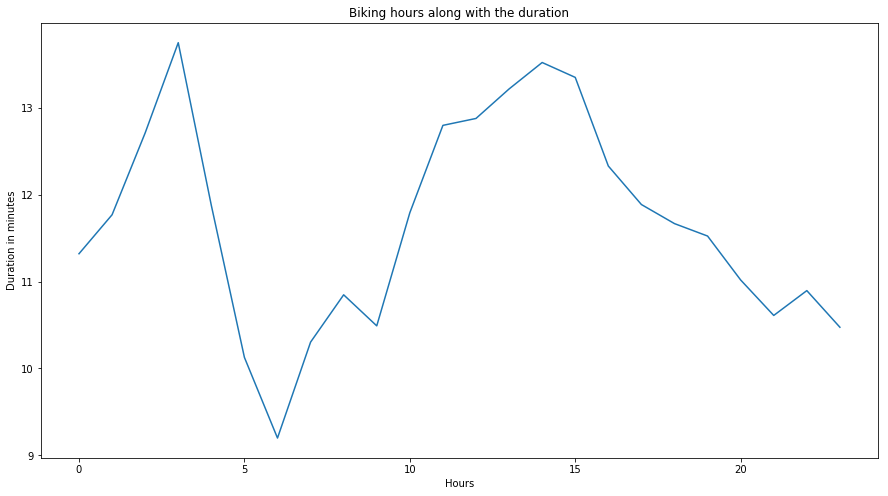

In [75]:
fig = plt.figure(figsize = [15,8])
sb.lineplot(data=df_clean, x='start_hour', y='duration_minute', err_style=None);
plt.title('Biking hours along with the duration');
plt.xlabel('Hours');
plt.ylabel('Duration in minutes');

##### As shown, the longest duration for ride a bike is less than 5 AM colse to 3 AM and 4 AM.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The attribute that I picked had strong relationship, As shown in the graphs 5 PM is the most counted time for trips and two graghs supported this. Also, the last graph reflect the longest duration of trip according to the start time,that showed the longest close to 3 AM and 4 AM. More investigate will make in the multivariate exploration.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Tuesday is the highest count in ride bike for subscriber while customer gets the highest count in Saturday.
- Tuesday at 5 PM is the highest count for ride a bike comparing to other days and hours.
- 5 PM is the most counted time for ride a bike for both user type.
- Longest trips counted at less than 5 AM close to 3 AM and 5 AM.

## Multivariate Exploration

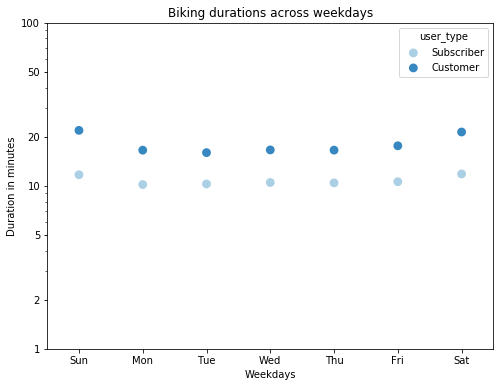

In [76]:
fig = plt.figure(figsize = [8,6]);
ax = sb.pointplot(data = df_clean, x = 'start_day', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '');
plt.title('Biking durations across weekdays')
plt.xlabel('Weekdays')
plt.ylabel('Duration in minutes')
plt.yscale('log')
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
ax.set_yticklabels([],minor = True);

###### As shown, Customer users are ride for a long time more than the subscriber

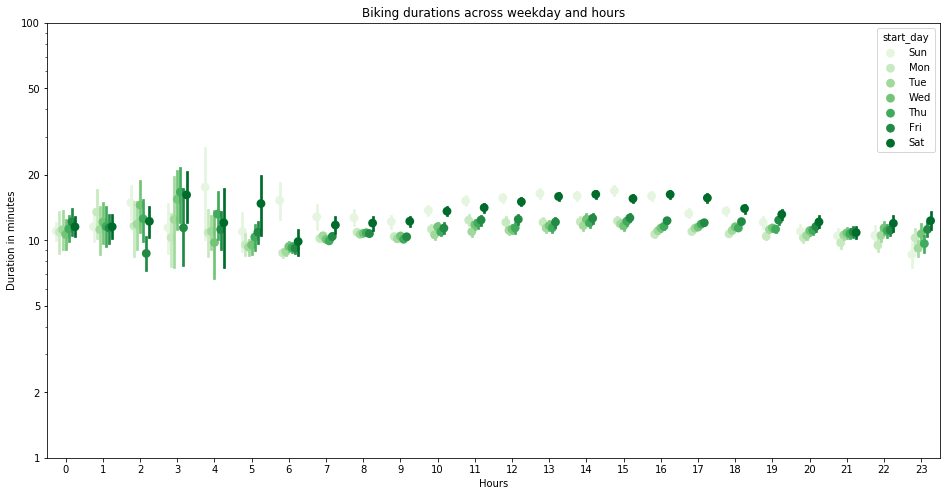

In [77]:
fig = plt.figure(figsize = [16,8])
a = sb.pointplot(data = df_clean, x = 'start_hour', y = 'duration_minute', hue = 'start_day',
           palette = 'Greens', linestyles = '', dodge = 0.5);
plt.title('Biking durations across weekday and hours')
plt.xlabel('Hours');
plt.ylabel('Duration in minutes')
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
a.set_yticklabels([],minor = True);

###### As shown, The duration is longest in Sunday at 4 am comparing to the other days

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- I observed the relationship between the start_day, duration_minute, and user_type that showed me an impressed result, customer users ride the bike for a longer time than the subscriber user. Also, the second relationship showed me users favorite to bike for along time.

### Were there any interesting or surprising interactions between features?

- Customer users are ride for a long time more than the subscribe specally in Sunday and Sturday.
- Users favorite time is 3 AM and 4 AM to ride bike for a long time in Saturday and Friday.

In [78]:
df_clean.to_csv('clean_file.csv', index=False)

### Refrences
>https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
>https://seaborn.pydata.org/generated/seaborn.lineplot.html